In [1]:
import sys
sys.path.append("../../src")

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Load and preprocess data

In [4]:
import data

In [19]:
# set db path hackily
data._get_connection("../../data/participants.db")

raw_df = data.get_trials_df(data.load_raw_results(),
                            ("experiment_id", "materials_id", "item_id", "condition_id",
                             "practice_sentence"))

EXPERIMENT_ID = "01_production_swarm-topicality"
response_df = raw_df[(raw_df.experiment_id == EXPERIMENT_ID) & (raw_df.trial_type == "survey-multi-choice-ext")] \
    .reset_index().set_index(["uniqueid", "trial_index"])

Missing datastring for uid A1I3TPX8GA7ISU:3634BBTX0PI2DDMJKQL1T7BJTU3IF4. Status was 1.
Missing datastring for uid A33LYSCQQU1YDJ:31JLPPHS2VIHTNHTYQX3Y0LM83NO3X. Status was 1.


In [20]:
response_df.head()

condition  counterbalance assignmentId  \
uniqueid                trial_index                                           
debug3RZ0EW:debugSKRMKQ 3                    0               0  debugSKRMKQ   
                        5                    0               0  debugSKRMKQ   
                        6                    0               0  debugSKRMKQ   
                        7                    0               0  debugSKRMKQ   
                        8                    0               0  debugSKRMKQ   

                                        workerId        hitId  \
uniqueid                trial_index                             
debug3RZ0EW:debugSKRMKQ 3            debug3RZ0EW  debug1GI6AE   
                        5            debug3RZ0EW  debug1GI6AE   
                        6            debug3RZ0EW  debug1GI6AE   
                        7            debug3RZ0EW  debug1GI6AE   
                        8            debug3RZ0EW  debug1GI6AE   

                                                  trial_type      rt  \
uniqueid                trial_index                                    
debug3RZ0EW:debugSKRMKQ 3            survey-multi-choice-ext  1442.8   
                        5            survey-multi-choice-ext  2702.3   
                        6            survey-multi-choice-ext  3762.9   
                        7            survey-multi-choice-ext  2017.5   
                        8            survey-multi-choice-ext  3500.4   

                                    internal_node_id       dateTime  \
uniqueid                trial_index                                   
debug3RZ0EW:debugSKRMKQ 3                    0.0-3.0  1628610200173   
                        5                    0.0-5.0  1628610203481   
                        6                    0.0-6.0  1628610207247   
                        7                    0.0-7.0  1628610209267   
                        8                    0.0-8.0  1628610212771   

                                                      experiment_id  \
uniqueid                trial_index                                   
debug3RZ0EW:debugSKRMKQ 3            01_production_swarm-topicality   
                        5            01_production_swarm-topicality   
                        6            01_production_swarm-topicality   
                        7            01_production_swarm-topicality   
                        8            01_production_swarm-topicality   

                                        materials_id  item_id  \
uniqueid                trial_index                             
debug3RZ0EW:debugSKRMKQ 3                       None      NaN   
                        5            swarm-003-drops     56.0   
                        6            swarm-003-drops     31.0   
                        7            swarm-003-drops      7.0   
                        8            swarm-003-drops     11.0   

                                        condition_id practice_sentence  \
uniqueid                trial_index                                      
debug3RZ0EW:debugSKRMKQ 3                       None              True   
                        5                     [1, 1]              None   
                        6                     [0, 1]              None   
                        7                     [0, 1]              None   
                        8            [filler, order]              None   

                                     survey_question_idx survey_answer  \
uniqueid                trial_index                                      
debug3RZ0EW:debugSKRMKQ 3                              0          good   
                        5                              0         agent   
                        6                              0      location   
                        7                              0      location   
                        8                              0          good   

                                

In [21]:
# Expand condition labels, which are tuples
response_df = pd.concat([response_df, response_df.condition_id.apply(pd.Series).rename(columns=lambda x: f"condition_{x}")], axis=1) \
    .drop(columns="condition_id")

In [22]:
# Convert condition_id to independent features
response_df["agent_is_topic"] = response_df["condition_0"] == 1

In [24]:
# dtype fixes
response_df["dateTime"] = pd.to_datetime(response_df.dateTime, unit="ms")

In [25]:
response_df.head()

condition  counterbalance assignmentId  \
uniqueid                trial_index                                           
debug3RZ0EW:debugSKRMKQ 3                    0               0  debugSKRMKQ   
                        5                    0               0  debugSKRMKQ   
                        6                    0               0  debugSKRMKQ   
                        7                    0               0  debugSKRMKQ   
                        8                    0               0  debugSKRMKQ   

                                        workerId        hitId  \
uniqueid                trial_index                             
debug3RZ0EW:debugSKRMKQ 3            debug3RZ0EW  debug1GI6AE   
                        5            debug3RZ0EW  debug1GI6AE   
                        6            debug3RZ0EW  debug1GI6AE   
                        7            debug3RZ0EW  debug1GI6AE   
                        8            debug3RZ0EW  debug1GI6AE   

                                                  trial_type      rt  \
uniqueid                trial_index                                    
debug3RZ0EW:debugSKRMKQ 3            survey-multi-choice-ext  1442.8   
                        5            survey-multi-choice-ext  2702.3   
                        6            survey-multi-choice-ext  3762.9   
                        7            survey-multi-choice-ext  2017.5   
                        8            survey-multi-choice-ext  3500.4   

                                    internal_node_id                dateTime  \
uniqueid                trial_index                                            
debug3RZ0EW:debugSKRMKQ 3                    0.0-3.0 2021-08-10 15:43:20.173   
                        5                    0.0-5.0 2021-08-10 15:43:23.481   
                        6                    0.0-6.0 2021-08-10 15:43:27.247   
                        7                    0.0-7.0 2021-08-10 15:43:29.267   
                        8                    0.0-8.0 2021-08-10 15:43:32.771   

                                                      experiment_id  \
uniqueid                trial_index                                   
debug3RZ0EW:debugSKRMKQ 3            01_production_swarm-topicality   
                        5            01_production_swarm-topicality   
                        6            01_production_swarm-topicality   
                        7            01_production_swarm-topicality   
                        8            01_production_swarm-topicality   

                                        materials_id  item_id  \
uniqueid                trial_index                             
debug3RZ0EW:debugSKRMKQ 3                       None      NaN   
                        5            swarm-003-drops     56.0   
                        6            swarm-003-drops     31.0   
                        7            swarm-003-drops      7.0   
                        8            swarm-003-drops     11.0   

                                    practice_sentence  survey_question_idx  \
uniqueid                trial_index                                          
debug3RZ0EW:debugSKRMKQ 3                        True                    0   
                        5                        None                    0   
                        6                        None                    0   
                        7                        None                    0   
                        8                        None                    0   

                                    survey_answer  slider_value slider_copout  \
uniqueid                trial_index                                             
debug3RZ0EW:debugSKRMKQ 3                    good           NaN           NaN   
                        5                   agent           NaN           NaN   
                        6                location           NaN           NaN   
                        7                location      

In [26]:
response_df.to_csv("raw_responses.csv")

## Preliminaries

In [27]:
subjects = set(response_df.index.get_level_values("uniqueid"))

### Demo

In [28]:
qualitative_df = raw_df[(raw_df.experiment_id == EXPERIMENT_ID) & raw_df.trial_type.isin(("survey-text", "survey-multi-choice"))]

<AxesSubplot:xlabel='survey_answer', ylabel='Count'>

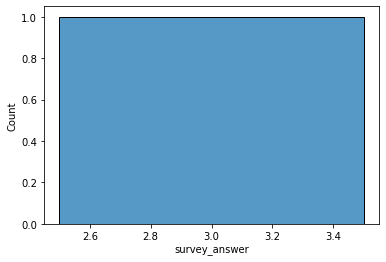

In [29]:
ages = qualitative_df[(qualitative_df.trial_type == "survey-text") & (qualitative_df.internal_node_id == "0.0-0.0")].survey_answer.astype(int)
sns.histplot(ages)

In [30]:
education = qualitative_df[(qualitative_df.trial_type == "survey-multi-choice") & (qualitative_df.survey_question_idx == 0)].survey_answer
education.value_counts()

Master's degree    1
Name: survey_answer, dtype: int64

In [31]:
native = qualitative_df[(qualitative_df.trial_type == "survey-multi-choice") & (qualitative_df.survey_question_idx == 1)].survey_answer
native.value_counts()

Yes    1
Name: survey_answer, dtype: int64

### Comments

In [32]:
qualitative_df[(qualitative_df.trial_type == "survey-text") & (qualitative_df.internal_node_id != "0.0-0.0")].survey_answer

Series([], Name: survey_answer, dtype: object)

### Total times

Text(0.5, 1.0, 'Total study time (minutes)')

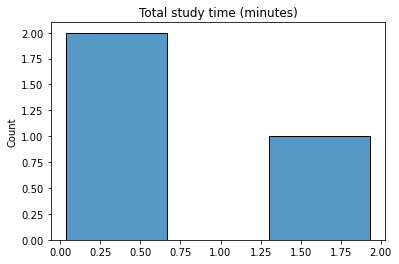

In [33]:
sns.histplot(pd.concat([response_df, qualitative_df]).groupby("uniqueid").apply(lambda rows: rows.rt.sum() / 1000 / 60))
plt.title("Total study time (minutes)")

In [34]:
pd.concat([response_df, qualitative_df]).groupby("uniqueid").rt.sum().apply(lambda xs: xs / 1000 / 60).agg(["mean", "std"])

mean    0.682480
std     1.083475
Name: rt, dtype: float64

### Response times

In [35]:
# sns.displot(data=response_df, x="rt", hue="uniqueid", kind="hist")

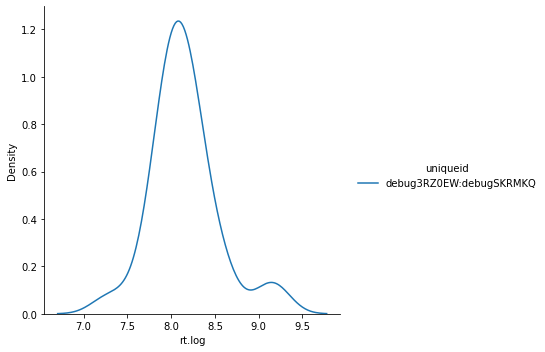

In [36]:
response_df["rt.log"] = np.log(response_df.rt)
sns.displot(data=response_df, x="rt.log", hue="uniqueid", kind="kde")

## Attention checks

### Practice round

In [23]:
# def compute_practice_success(subj_rows):
#     """
#     Compute fraction of practice sentences for which response equals
#     ground truth.
#     """
#     practice_rows = subj_rows[~subj_rows.practice_sentence.isna()]
#     practice_rows[["practice_rating", "practice_idx"]] = practice_rows.practice_sentence.str.split("-", 1, expand=True)
#     success = practice_rows["practice_rating"].astype(int) == practice_rows["slider_value"]
#     return success.mean()
    
# practice_attention_failures = response_df.groupby("uniqueid").apply(compute_practice_success)
# practice_attention_failures = practice_attention_failures[practice_attention_failures < 1]
# practice_attention_failures

uniqueid
A1GZFCHTPVEC2Z:3IXEICO7937W3Y9JD9H0ZD3THFPT63    0.333333
A1PKTH9O2E5FVD:3LEIZ60CDKNF7TKGH89U5BVCSA79ZU    0.666667
A1VR1XQEQQXYUE:3X4JMASXCNX1T1TNBYAYQINGY3R0B3    0.666667
A23IR7G86SLJ9H:3PWWM24LHTMPNDYUN9U2I4QUNVY28Y    0.000000
A24Z9ILARXI8DT:3WYGZ5XF3X32NDHTQD6BZRCPGR2SKP    0.000000
A27BCUGIYJYCWR:3AUQQEL7U6HG2FRTGF1YRUHN1XK0VQ    0.000000
A2BA2KLNO29T8D:3CCZ6YKWR87H0F0RAK2EG7OHRCE590    0.000000
A2GGYB0IY743OD:3PZDLQMM0U9RZGO74LA7KQMDDMJ2C4    0.333333
A2H68I6S6PKMV5:3K772S5NP9ZAB4B3JXJ9XISINJTHED    0.333333
A2O176ITLYSAVF:3GU1KF0O4JP4HIX7SJPO5JOO6DQPBQ    0.000000
A2R7PDGVB16KGY:37QW5D2ZRHAISCFSHO989M3YLPWS8Q    0.333333
A2S1CTTMLZIMVV:3P1L2B7AD2DY9R7I4W13UMF382XOLK    0.000000
A2YC6PEMIRSOAA:3K9FOBBF2I7GR6763H1QFXFYIRULN2    0.666667
A35X2CHJGNRQLY:3QECW5O0KIP0KU958Q7V77PTLKET5N    0.000000
A38C4RKZTI9WNM:3HYA4D452S7Y2S8HVN08SW7GAZ3F2K    0.000000
A39LVL4A92K88X:3FE7TXL1LJBVTHYQ93B24VBUH2R2QI    0.666667
A3A6BVDDO2M1C9:3M23Y66PO3VVOYW4O9CAP877FU6S64    0.000000
A3I1X

### Fillers

<AxesSubplot:xlabel='survey_answer'>

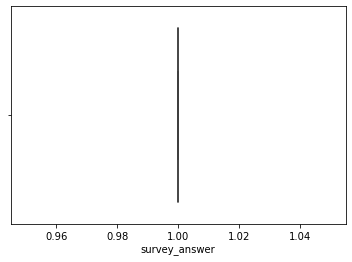

In [46]:
filler_stats = response_df[response_df.condition_0 == "filler"].reset_index() \
    .groupby(["uniqueid", "condition_1"]).apply(lambda xs: (xs.survey_answer == "good").astype(float))
sns.boxplot(data=filler_stats.reset_index(), x="survey_answer", hue="uniqueid")

In [50]:
filler_stats_summary = filler_stats.groupby("uniqueid").mean()
filler_stats_summary.sort_values()

uniqueid
debug3RZ0EW:debugSKRMKQ    1.0
Name: survey_answer, dtype: float64

## Final data processing

In [47]:
exp_items = response_df[(response_df.condition_0 != "filler") & response_df.practice_sentence.isna()]

### Filter based on practice and attention checks

In [51]:
attention_drops = filler_stats_summary[(filler_stats_summary < 0.95)]
drop_pct = np.round(len(attention_drops) / len(filler_stats_summary.index) * 100, 1)
print(f"{len(attention_drops)} subjects ({drop_pct}%, possibly overlapping with previous) disqualified and dropped due to failed attention checks.")
print("\t" + "\n\t".join(attention_drops.index))
exp_items = exp_items.drop(attention_drops.index, level="uniqueid")

0 subjects (0.0%, possibly overlapping with previous) disqualified and dropped due to failed attention checks.
	


In [52]:
print(f"{len(set(exp_items.index.get_level_values('uniqueid')))} subjects remaining.")

1 subjects remaining.


### Compute match

In [66]:
exp_items["match"] = exp_items.apply(lambda r: r.survey_answer == ("agent" if r.agent_is_topic else "location"), axis=1)

### Merge in materials

In [67]:
import json
def load_materials(mat):
    with open(f"../../materials/{mat}.json") as f:
        materials = json.load(f)
    return pd.DataFrame.from_records(materials["items"]).rename(columns={"id": "item_id"}).set_index("item_id")

materials_ids = sorted(set(exp_items.materials_id))
materials_df = pd.concat([load_materials(mat) for mat in materials_ids], names=["materials_id"], keys=materials_ids, axis=0)

materials_df["AV"] = materials_df.A.str.cat(materials_df.V, " ")

# NB this doesn't handle fillers correctly

In [68]:
keep_cols = ["A", "V", "L", "AV", "A concrete?", "A countable?"]
merged_df = pd.merge(exp_items, materials_df[keep_cols], left_on=["materials_id", "item_id"], right_index=True)

### Export

In [69]:
merged_df.to_csv("merged_df.csv")

## Analysis

<AxesSubplot:xlabel='agent_is_topic', ylabel='match'>

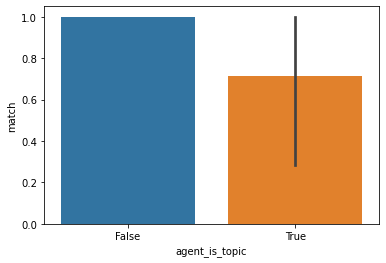

In [62]:
sns.barplot(data=exp_items.reset_index(), x="agent_is_topic", y="match")

### Item exposure

In [64]:
merged_df[merged_df.condition_0 != "filler"] \
    .groupby(["item_id", "AV", "agent_is_topic"]).size().sort_values()

item_id  AV                 agent_is_topic
0.0      bees swarm         True              1
39.0     sewage runn        True              1
31.0     excitement puls    False             1
30.0     fear prickl        False             1
25.0     energy humm        False             1
24.0     frogs hopp         False             1
22.0     lights glow        False             1
19.0     bubbles foam       False             1
17.0     debris flow        False             1
8.0      cockroaches creep  True              1
7.0      excitement crackl  False             1
6.0      terror cours       False             1
5.0      conversation buzz  True              1
4.0      people bustl       True              1
3.0      trumpets ring      False             1
2.0      ants crawl         False             1
56.0     tadpoles swimm     True              1
64.0     worms wriggl       True              1
dtype: int64

### Concreteness

<AxesSubplot:xlabel='agent_is_topic', ylabel='match'>

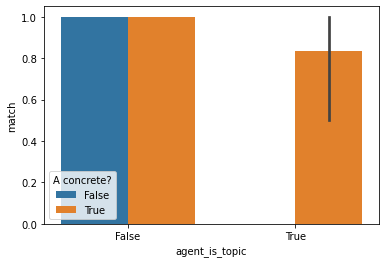

In [70]:
sns.barplot(data=merged_df[merged_df.condition_0 != "filler"].reset_index(), x="agent_is_topic", y="match", hue="A concrete?")